### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points
<br> 8. Upload your work to github - 5 points. Google/dropbox/yandex drive - 0 points

Max = 75 points!

##### Main notes:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


Please, upload to a google/dropbox/yandex drive or github  and send the link to the following google form: https://docs.google.com/forms/d/e/1FAIpQLSeeYILriugs1Vdxa3r01nS1469VT-_t_ZCNF18zwQVl-XKkHQ/viewform?usp=sf_link 

If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 

**The deadline is 27th of May, 12 o'Clock in the noon**


####  Good luck and have fun!


##### Task 1. Dataloader

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


##### Task 2. Augmentation

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


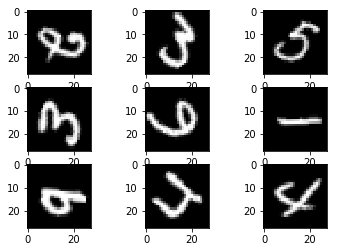

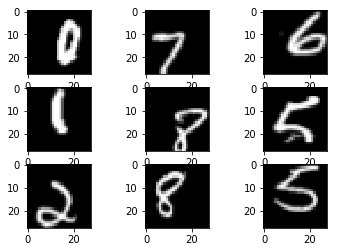

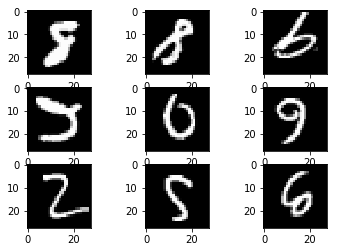

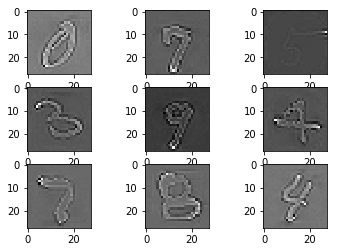

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
shift = 0.2
# reshape to be [samples][pixels][width][height]
X_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
X_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen1 = ImageDataGenerator(rotation_range=90)
datagen2 = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen3 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen4 = ImageDataGenerator(zca_whitening=True)

def dd(datagen):
  
  # fit parameters from data
  datagen.fit(X_train)
  # configure batch size and retrieve one batch of images
  for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
    for i in range(0, 9):
      pyplot.subplot(330 + 1 + i)
      pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	   # show the plot
    pyplot.show()
    break
 
dd(datagen1)
dd(datagen2)
dd(datagen3)
dd(datagen4)


##### Task 3. Neural Network

In [63]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


##### Task 4. Train loop

In [66]:
history = model.fit( x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 214s 4ms/step - loss: 0.2637 - acc: 0.9194 - val_loss: 0.0654 - val_acc: 0.9789
Epoch 2/2
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0927 - acc: 0.9726 - val_loss: 0.0425 - val_acc: 0.9862


##### Task 5. Loss plot

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


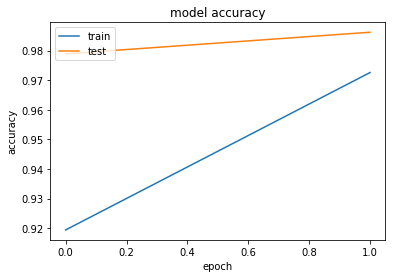

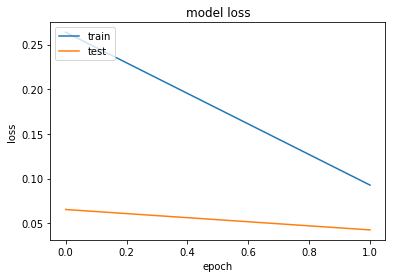

In [67]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Task 6. Test set accuracy

In [68]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.042508832787035496
Test accuracy: 0.9862


##### Task 7. Inference

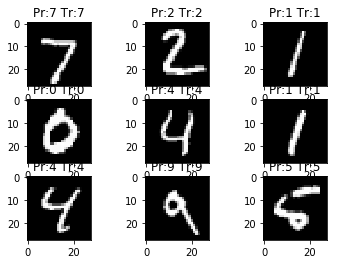

In [69]:
import numpy as np
for i in range(0, 9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_test[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  plt.title("Pr:{} Tr:{}".format(predicted_classes[i], int(np.where(y_test[i]==1)[0])))
  # show the plot
pyplot.show()